In [51]:
import numpy as np
import pandas as pd

In [52]:
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/InClassPractice/data.csv")

In [53]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                564 non-null    object 
 1   radius_mean              564 non-null    float64
 2   texture_mean             564 non-null    float64
 3   perimeter_mean           564 non-null    float64
 4   area_mean                564 non-null    float64
 5   smoothness_mean          564 non-null    float64
 6   compactness_mean         564 non-null    float64
 7   concavity_mean           564 non-null    float64
 8   concave points_mean      564 non-null    float64
 9   symmetry_mean            564 non-null    float64
 10  fractal_dimension_mean   564 non-null    float64
 11  radius_se                564 non-null    float64
 12  texture_se               564 non-null    float64
 13  perimeter_se             564 non-null    float64
 14  area_se                  5

## Split data

In [55]:
X = dataset.drop('diagnosis', axis=1)
y = dataset.diagnosis

## Encode y

In [56]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

In [57]:
y[0:5]

array([1, 1, 1, 1, 1])

## Split data

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

## Scale X

In [59]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

## Build ANN Model

In [60]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [61]:
n_features = X_train.shape[1]
print(n_features)

30


In [62]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(n_features, )))

In [63]:
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## Compile model

In [64]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), batch_size=32, verbose=0)

## Model validation

In [66]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"loss: {loss}, accuracy: {acc}")

loss: 0.20247165858745575, accuracy: 0.9529411792755127


## Plot accuracy and loss

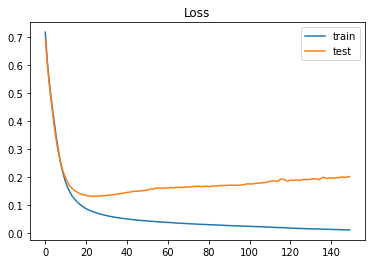

In [67]:
import matplotlib.pyplot as plt
plt.title("Loss")
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

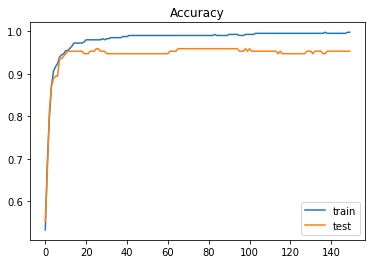

In [68]:
plt.title("Accuracy")
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

## Confusion Matrix and Classification Report

In [69]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

6/6 [==============================] - 0s 2ms/step


In [70]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[100   3]
 [  5  62]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       103
           1       0.95      0.93      0.94        67

    accuracy                           0.95       170
   macro avg       0.95      0.95      0.95       170
weighted avg       0.95      0.95      0.95       170



## Predict on new case

In [71]:
val = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/InClassPractice/Validate.csv")
val_list = val.values.tolist()

In [77]:
for i in range(0, 5):
  data = val_list[i][1:]
  if model.predict(sc_x.transform([data])) > 0.5:
    print("Patient is malignant")
  else:
    print("Patient is benign")

1/1 [==============================] - 0s 28ms/step
Patient is malignant
1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Patient is malignant
1/1 [==============================] - 0s 38ms/step
Patient is malignant
1/1 [==============================] - 0s 32ms/step
Patient is benign
1/1 [==============================] - 0s 26ms/step
Patient is benign


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
